# Scénario

Félicitations ! Vous avez récemment rejoint une équipe de chercheurs de la Food and Agriculture Organization of the United Nations (FAO), en tant que data analyst.

![Food](https://user.oc-static.com/upload/2020/11/23/16061289311922_Capture%20d%E2%80%99e%CC%81cran%202020-11-23%20a%CC%80%2011.06.07.png)

Son rôle ? C’est l’un des organes qui composent l’ONU et dont l’objectif est « d’aider à construire un monde libéré de la faim ». 

Le responsable de l’équipe, Marc, un chercheur en économie de la santé, est particulièrement enthousiaste à l’idée de votre arrivée au sein de son équipe. 
En effet, ce recrutement tombe à pic car Julien, l'ancien data analyst, a récemment été muté dans une autre équipe, et la vôtre vient de se voir confier la mission de réaliser une étude de grande ampleur sur le thème de la sous-nutrition dans le monde.

## Importation des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Charger et voir les données 

### 1- Données sur le nombre de personnes en sous nutrition dans le Monde

In [2]:
url = 'D:\\Downloads\\DAN-P4-FAO\\sous_nutrition.csv'
df_1 = pd.read_csv(url, index_col=0, encoding = "utf-8")
df_sous_nutr=df_1.copy()


In [14]:
df_sous_nutr.head()

,Année,Valeur
Zone,,
Afghanistan,2012-2014,8.6
Afghanistan,2013-2015,8.8
Afghanistan,2014-2016,8.9
Afghanistan,2015-2017,9.7
Afghanistan,2016-2018,10.5


## Analyse de la forme des données

In [21]:
df_sous_nutr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1218 entries, Afghanistan to Zimbabwe
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Année   1218 non-null   object
 1   Valeur  624 non-null    object
dtypes: object(2)
memory usage: 28.5+ KB


Le Dtype des colonnes Année et Valeur sont des objects.
 Le prétraitement à faire est de:
 - convertir les valeurs de la colonne Année en YYYY
 - convertir le dtype de la colonne Année en datetime 
 - convertir le dtype de la colonne Valeur en float (valeur quantitative)

#### Convertir les valeurs de la colonne Année en YYYY et son dtype en datetime

In [6]:
df_sous_nutr["Année"][(df_sous_nutr["Année"] == "2012-2014")] = "2013"
df_sous_nutr["Année"][(df_sous_nutr["Année"] == "2013-2015")] = "2014"
df_sous_nutr["Année"][(df_sous_nutr["Année"] == "2014-2016")] = "2015"
df_sous_nutr["Année"][(df_sous_nutr["Année"] == "2015-2017")] = "2016"
df_sous_nutr["Année"][(df_sous_nutr["Année"] == "2016-2018")] = "2017"
df_sous_nutr["Année"][(df_sous_nutr["Année"] == "2017-2019")] = "2018"


In [7]:
df_sous_nutr["Année"]= pd.to_datetime(df_sous_nutr['Année'],format="%Y")
df_sous_nutr

,Année,Valeur
Zone,,
Afghanistan,2013-01-01,8.6
Afghanistan,2014-01-01,8.8
Afghanistan,2015-01-01,8.9
Afghanistan,2016-01-01,9.7
Afghanistan,2017-01-01,10.5
...,...,...
Zimbabwe,2014-01-01,NaN
Zimbabwe,2015-01-01,NaN
Zimbabwe,2016-01-01,NaN


La colonne Valeur correspond au nombre de personnes (en millions) en état de malnutrition.

In [42]:
df_sous_nutr.shape

(1218, 2)

#### Compter les valeurs NaN 

In [19]:
df_sous_nutr["Valeur"].isnull().value_counts()

False    624
True     594
Name: Valeur, dtype: int64

In [21]:
(df_sous_nutr.isnull().sum()/df_sous_nutr.shape[0]).sort_values(ascending=True)

Année     0.000000
Valeur    0.487685
dtype: float64

Il y a tout de même 48.7 % de NaN dans le Dataframe, les supprimer serait trop donc je vais les remplacer par 0.

In [ ]:
df_sous_nutr = df_sous_nutr.fillna(0)

#### Compter les valeurs de la colonne Valeur

<AxesSubplot:ylabel='Valeur'>

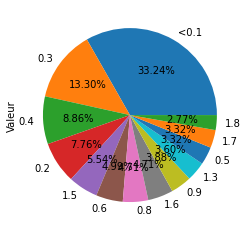

In [22]:

plt.figure()
df_sous_nutr["Valeur"].value_counts().head(13).plot.pie(autopct="%.2f%%")

On remarque que les valeurs "<0.1" sont prédominantes et que ce sont des chaines de caractère et non des float

#### Je remplace les valeurs "<1" par "0.0" et je convertis son dtype en float

In [ ]:
df_sous_nutr["Valeur"][(df_sous_nutr["Valeur"] == "<0.1")] = "0.0"
df_sous_nutr["Valeur"] = df_sous_nutr["Valeur"].astype(float)


### 2- Données sur la démographie dans le Monde

In [9]:
url = 'D:\Downloads\DAN-P4-FAO\population.csv'
df_2 = pd.read_csv(url, index_col=0, encoding = "utf-8")
df_pop=df_2.copy()



In [5]:
df_pop.head()

,Année,Valeur
Zone,,
Afghanistan,2013,32269.589
Afghanistan,2014,33370.794
Afghanistan,2015,34413.603
Afghanistan,2016,35383.032
Afghanistan,2017,36296.113


Renommons la colonne Valeur en Population

In [49]:
df_pop.rename(columns={"Valeur":"Population"}, inplace=True)

In [20]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1416 entries, Afghanistan to Zimbabwe
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Année   1416 non-null   int64  
 1   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 33.2+ KB


Je normalise la colonne Population en millions 

In [47]:
df_pop["Population"] = df_pop["Population"] /1000
df_pop.head()

,Année,Valeur
Zone,,
Afghanistan,2013,32.269589
Afghanistan,2014,33.370794
Afghanistan,2015,34.413603
Afghanistan,2016,35.383032
Afghanistan,2017,36.296113


In [16]:
df_pop.shape

(1416, 2)

In [45]:
df_pop["Population"].isnull().value_counts()

False    1416
Name: Valeur, dtype: int64

#### 3- Données sur la disponibilité alimentaire dans le Monde

In [87]:
url = 'D:\Downloads\DAN-P4-FAO\dispo_alimentaire.csv'
df_3 = pd.read_csv(url, index_col=0, encoding = "utf-8")
df_dispo_alim=df_3.copy()


In [12]:
df_dispo_alim.head(5)

,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,,,
Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


## Analyse de la forme des données

In [23]:
df_dispo_alim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15605 entries, Afghanistan to Îles Salomon
Data columns (total 17 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Produit                                                        15605 non-null  object 
 1   Origine                                                        15605 non-null  object 
 2   Aliments pour animaux                                          2720 non-null   float64
 3   Autres Utilisations                                            5496 non-null   float64
 4   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 5   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 6   Disponibilité de matière grasse en quantité (g/personne/jour)  11794 non-null  float64
 7   Disponibilité de protéines en quantité (g/pers

In [24]:
df_dispo_alim.shape

(15605, 17)

#### Nombre de pays dans le DataFrame

In [137]:
df_dispo_alim.index.nunique()

174

#### Proportion (%) de NaN par Colonne

In [168]:
((df_dispo_alim.isnull().sum()/df_dispo_alim.shape[0]).sort_values(ascending=False) *100)

Semences                                                         86.600449
Traitement                                                       85.312400
Aliments pour animaux                                            82.569689
Pertes                                                           72.585710
Autres Utilisations                                              64.780519
Variation de stock                                               56.578020
Production                                                       41.172701
Disponibilité de protéines en quantité (g/personne/jour)         25.914771
Disponibilité de matière grasse en quantité (g/personne/jour)    24.421660
Exportations - Quantité                                          21.653316
Nourriture                                                       10.189042
Disponibilité alimentaire en quantité (kg/personne/an)           10.189042
Disponibilité alimentaire (Kcal/personne/jour)                    8.740788
Importations - Quantité  

Il y a énormément de NaN donc je les remplace par 0

In [88]:
df_dispo_alim = df_dispo_alim.fillna(0)

Pour simplifier les calculs pour la suite je multiplie par 1 000 000 toutes les colonnes dont l'unité est milliers de tonnes en kg.

In [89]:
tonnes_columns = ["Aliments pour animaux", "Disponibilité intérieure", "Exportations - Quantité", "Importations - Quantité",
                  "Nourriture", "Production", "Semences", "Traitement", "Variation de stock", "Autres Utilisations"]

for i in tonnes_columns:
    df_dispo_alim[i] *= 10**6

### 4- Données sur l'aide alimentaire apportée dans les pays pauvres

In [205]:
url = 'D:\\Downloads\\DAN-P4-FAO\\aide_alimentaire.csv'
df_4 = pd.read_csv(url, index_col=0, encoding = "utf-8")
df_aide_alim=df_4.copy()

In [10]:
df_aide_alim.head()

,Année,Produit,Valeur
Pays bénéficiaire,,,
Afghanistan,2013,Autres non-céréales,682
Afghanistan,2014,Autres non-céréales,335
Afghanistan,2013,Blé et Farin,39224
Afghanistan,2014,Blé et Farin,15160
Afghanistan,2013,Céréales,40504


Je renomme la colonne Pays bénéficiaire en Zone pour être raccord avec les autres Dataframes

In [206]:
df_aide_alim.rename(columns={"Pays bénéficiaire":"Zone"}, inplace=True)

### Analyse de la forme des données

In [27]:
df_aide_alim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1475 entries, Afghanistan to Zimbabwe
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Année    1475 non-null   int64 
 1   Produit  1475 non-null   object
 2   Valeur   1475 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 46.1+ KB


In [28]:
df_aide_alim.shape

(1475, 3)

In [171]:
df_aide_alim.index.unique()

Index(['Afghanistan', 'Algérie', 'Angola', 'Bangladesh', 'Bénin', 'Bhoutan',
       'Bolivie (État plurinational de)', 'Burkina Faso', 'Burundi',
       'Cambodge', 'Cameroun', 'Chine, continentale', 'Colombie', 'Comores',
       'Congo', 'Côte d'Ivoire', 'Cuba', 'Djibouti', 'Égypte', 'El Salvador',
       'Équateur', 'Éthiopie', 'Gambie', 'Géorgie', 'Ghana', 'Guatemala',
       'Guinée', 'Guinée-Bissau', 'Haïti', 'Honduras',
       'Iran (République islamique d')', 'Iraq', 'Jordanie', 'Kenya',
       'Kirghizistan', 'Lesotho', 'Liban', 'Libéria', 'Libye', 'Madagascar',
       'Malawi', 'Mali', 'Mauritanie', 'Mozambique', 'Myanmar', 'Népal',
       'Nicaragua', 'Niger', 'Ouganda', 'Pakistan', 'Palestine', 'Philippines',
       'République arabe syrienne', 'République centrafricaine',
       'République démocratique du Congo',
       'République démocratique populaire lao', 'République dominicaine',
       'République populaire démocratique de Corée',
       'République-Unie de Tanzanie

#### Nombre de pays qui ont bénéficié d'aides alimentaires

In [172]:
df_aide_alim.index.nunique()

76

In [169]:
df_aide_alim.isnull().value_counts()

Année  Produit  Valeur
False  False    False     1475
dtype: int64

Pour simplifier les calculs pour la suite je multiplie par 1 000 la colonne Valeur dont l'unité est la tonne en kg.

In [207]:
df_aide_alim["Valeur"] *= 1000

# 1. Réalisez une étude de santé publique avec Python

## Objectifs :
- Comprendre du mieux possible nos données (un petit pas en avant vaut mieux qu'un grand pas en arriere)
- Donner un panorama de l’état de la malnutrition dans le monde
- Trouver la proportion de personnes en état de sous-nutrition ;
- Trouver le nombre théorique de personnes qui pourraient être nourries. Tu devrais pouvoir calculer ça à partir de la disponibilité alimentaire mondiale ;
- idem pour la disponibilité alimentaire des produits végétaux ;
- L’utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine. Je crois que Julien avait trouvé un moyen de facilement calculer ces proportions.
- Donner les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017; 
- Ceux qui ont le plus bénéficié d’aide depuis 2013;
- Ceux ayant le plus/le moins de disponibilité/habitant

## Checklist de base
#### Analyse de Forme :
- **4 fichiers csv** : *sous_nutrition.csv, population.csv, dispo_alimentaire.csv, aide_alimentaire.csv*
- **lignes et colonnes** : (1218, 2) ; (1416, 2) ; (15605, 17); (1475, 3)
- **types de variables** : (qualitatives : 1, quantitatives : 1) ; (qualitatives : 1, quantitatives : 1) ; (qualitatives : 2, quantitatives : 15) ; (qualitatives : 2, quantitatives : 1)
- **Analyse des valeurs manquantes** :
    - *sous_nutrition.csv* : beaucoup de NaN (48,76%)
    - *population.csv* : 0%
    - *dispo_alimentaire.csv* : 35.11%
    - *aide_alimentaire.csv* : 0%

#### Analyse de Fond :

     
- **Signification des variables** :
     1. Un fichier de disponibilité alimentaire pour l’année 2013 qui contient 17 variables (*dispo_alimentaire.csv*) :
        - Le pays.
        - Le produit.
        - 4 variables de disponibilité alimentaire. Ces 4 variables sont exprimées dans des unités bien spécifiques, qui sont précisées directement dans le nom de la variable. À noter cependant que la notation kcal est un abus de langage, elle correspond à une calorie réelle.
        - 10 variables qui précisent les utilisations/moyens d’acquisition de la disponibilité alimentaire. Elles sont toutes exprimées en milliers de tonnes.
        - Enfin, une variable type qui précise si le produit est d’origine animale ou végétale.
        
     2. Un fichier d’insécurité alimentaire, qui inclut (*sous_nutrition.csv*):
        - Le pays.
        - Intervalle d’années.
        - Le nombre de personnes en sous-alimentation en millions d’habitants (ex. : pour l’intervalle 2012-2014, le nombre de personnes correspond à la moyenne sur ces 3 années, on peut le résumer en 2013).

     3. Un fichier de population qui inclut (*population.csv*):
        - Le pays.
        - L’année.
        - La population du pays, exprimée en milliers d’habitants.
        
     4. Un fichier d’aide alimentaire qui contient (*aide_alimentaire.csv*):
        - Le pays bénéficiaire.
        - L’année.
        - Le produit.
        - La quantité qui a été donnée comme aide alimentaire, en tonnes.


    
## Analyse plus détaillée





#### Conclusion rapide 

- Nous produisons bien assez de nourriture pour nourrir la planète entière mais il y a beaucoup de pertes et son utilisation n'est pas exclusive à l'alimentation humaine.
- Les pays en état de sous nutrition exportent enormément leurs céréales qui sont leurs principales ressources alimentaire.


    

# Missions données par Marc

### **1- Trouver la proportion de personnes en état de sous-nutrition**

#### Créer une liste du nombre de personnes en état de sous nutrition par année

In [10]:
Annee= ['2013','2014','2015','2016','2017','2018']
lst_sous_nutr =[]
for x in Annee:
 lst_sous_nutr.append(df_sous_nutr[df_sous_nutr["Année"] == f"{x}"].Valeur.sum())

In [11]:
lst_sous_nutr

[528.1000000000001, 523.5, 524.7, 528.5999999999999, 535.7, 544.1999999999999]

#### Créer un Dataframe pour lister le nombre total de personnes en état de sous nutrition par année + la population mondiale afin de calculer la proportion de personnes en état de sous nutrition

In [30]:
lst_pop_mond=[df_pop["Population"][df_pop["Année"] == 2013].sum(), 
              df_pop["Population"][df_pop["Année"] == 2014].sum(), 
              df_pop["Population"][df_pop["Année"] == 2015].sum(), 
              df_pop["Population"][df_pop["Année"] == 2016].sum(), 
              df_pop["Population"][df_pop["Année"] == 2017].sum(), 
              df_pop["Population"][df_pop["Année"] == 2018].sum()]
Sum = {'Année': Annee,
        'Total Personnes en ss_nutrition (en millions)': lst_sous_nutr,
        'Pop_Mondiale':lst_pop_mond
        }

df_ss_nutr_Sum = pd.DataFrame(Sum, columns = ['Année', 'Total Personnes en ss_nutrition (en millions)','Pop_Mondiale'])

#### Convertir dtype de la colonne Année en datetime car cela n'est pas une variable quantitative

In [31]:
df_ss_nutr_Sum["Année"] = pd.to_datetime(df_ss_nutr_Sum["Année"], format="%Y")
df_ss_nutr_Sum = df_ss_nutr_Sum.set_index(pd.DatetimeIndex(df_ss_nutr_Sum['Année']))

In [35]:
df_ss_nutr_Sum.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2018-01-01
Data columns (total 3 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Année                                          6 non-null      datetime64[ns]
 1   Total Personnes en ss_nutrition (en millions)  6 non-null      float64       
 2   Pop_Mondiale                                   6 non-null      float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 192.0 bytes


#### Ajouter une colonne Proportion de personnes en état de sous nutrition en %

In [37]:
df_ss_nutr_Sum["Proportion_ss_nutr(%)"] = (((df_ss_nutr_Sum["Total Personnes en ss_nutrition (en millions)"] * 10**6) / (df_ss_nutr_Sum["Pop_Mondiale"] * 10**6)) * 100)

In [482]:
df_ss_nutr_Sum.drop(columns="Année",axis=0)

,Total Personnes en ss_nutrition (en millions),Pop_Mondiale,Proportion_ss_nutr(%)
Année,,,
2013-01-01,528.1,7210.845848,7.323690
2014-01-01,523.5,7295.557771,7.175599
2015-01-01,524.7,7380.067075,7.109691
2016-01-01,528.6,7464.294742,7.081714
2017-01-01,535.7,7548.134111,7.097118
2018-01-01,544.2,7631.368523,7.131093


#### Créer un Dataframe pour visualiser la proportion de personnes en état de malnutrition dans le monde par année

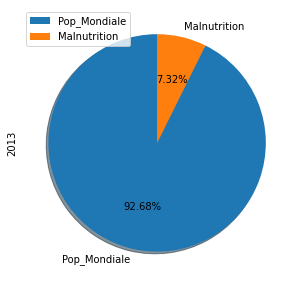

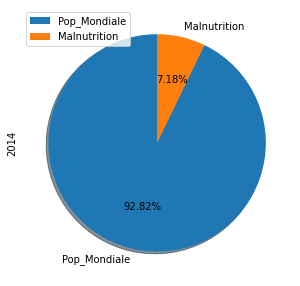

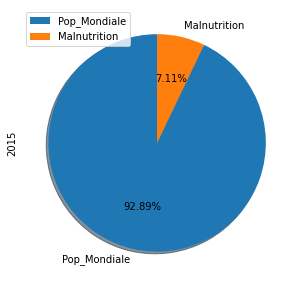

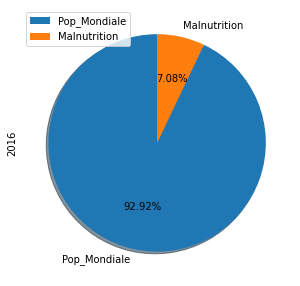

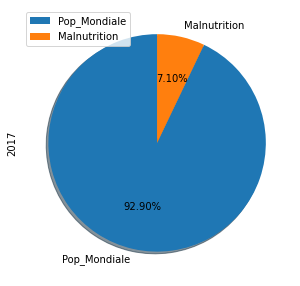

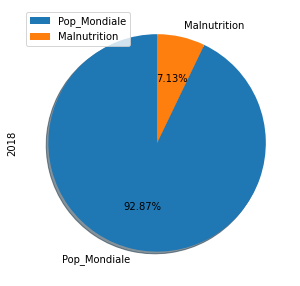

In [39]:
df = pd.DataFrame({'Flux0': [df_ss_nutr_Sum["Pop_Mondiale"][0]  - df_ss_nutr_Sum["Total Personnes en ss_nutrition (en millions)"][0] ,df_ss_nutr_Sum["Total Personnes en ss_nutrition (en millions)"][0]],
                  'Flux1': [df_ss_nutr_Sum["Pop_Mondiale"][1]  - df_ss_nutr_Sum["Total Personnes en ss_nutrition (en millions)"][1],df_ss_nutr_Sum["Total Personnes en ss_nutrition (en millions)"][1]],
                  'Flux2': [df_ss_nutr_Sum["Pop_Mondiale"][2]  - df_ss_nutr_Sum["Total Personnes en ss_nutrition (en millions)"][2],df_ss_nutr_Sum["Total Personnes en ss_nutrition (en millions)"][2]],
                  'Flux3': [df_ss_nutr_Sum["Pop_Mondiale"][3]  - df_ss_nutr_Sum["Total Personnes en ss_nutrition (en millions)"][3],df_ss_nutr_Sum["Total Personnes en ss_nutrition (en millions)"][3]],
                  'Flux4': [df_ss_nutr_Sum["Pop_Mondiale"][4]  - df_ss_nutr_Sum["Total Personnes en ss_nutrition (en millions)"][4],df_ss_nutr_Sum["Total Personnes en ss_nutrition (en millions)"][4]],
                  'Flux5': [df_ss_nutr_Sum["Pop_Mondiale"][5]  - df_ss_nutr_Sum["Total Personnes en ss_nutrition (en millions)"][5],df_ss_nutr_Sum["Total Personnes en ss_nutrition (en millions)"][5]]},

                  index=['Pop_Mondiale', 'Malnutrition'])
for i in range(0,6):
 df.plot.pie(label=df_ss_nutr_Sum.index.year[i] ,y=f'Flux{i}',shadow=True,autopct="%.2f%%",figsize=(5, 5),startangle=90)


## Requête Falcultative

#### Courbe représentant l'évolution du nombre de personnes en état de malnutrition dans le monde par année

<Figure size 1440x504 with 0 Axes>

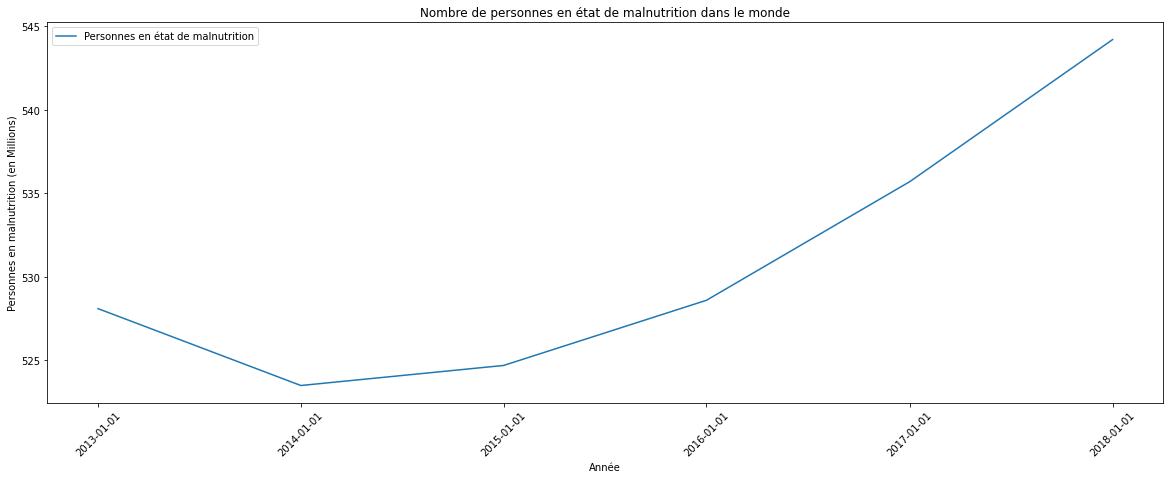

In [40]:
plt.figure(figsize=(20,7))
fig, ax1 = plt.subplots(figsize=(20, 7))
plt.plot(df_ss_nutr_Sum["Total Personnes en ss_nutrition (en millions)"], label='Personnes en état de malnutrition')
plt.title(f'Nombre de personnes en état de malnutrition dans le monde')
plt.xticks(df_ss_nutr_Sum.index,rotation = 45)
plt.xlabel('Année')
plt.ylabel('Personnes en malnutrition (en Millions)')
plt.legend(loc = 'upper left')
plt.show()


#### Courbe représentant l'évolution de la proportion de personnes en état de malnutrition dans le monde par année

<Figure size 1440x504 with 0 Axes>

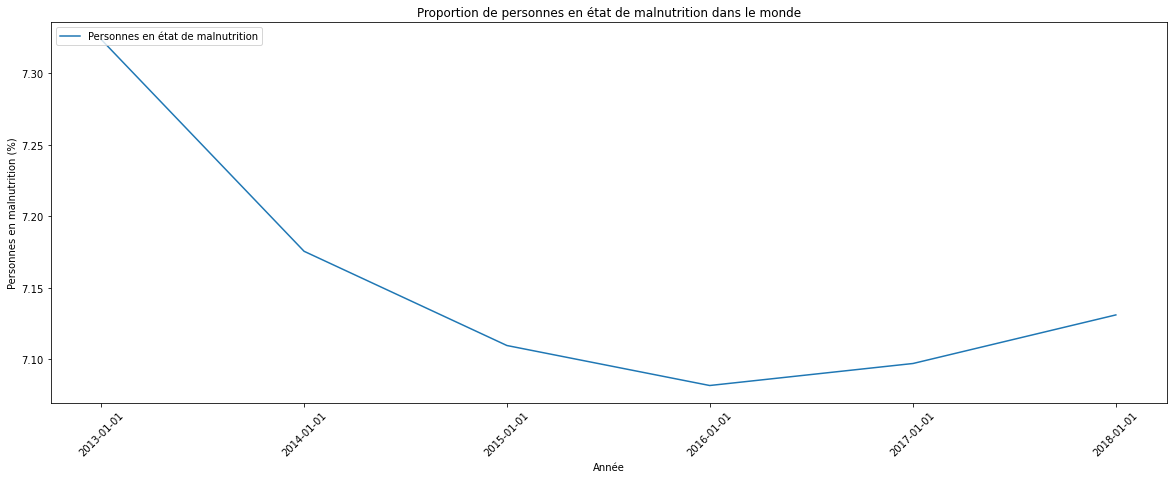

In [41]:
plt.figure(figsize=(20,7))
fig, ax1 = plt.subplots(figsize=(20, 7))
plt.plot(df_ss_nutr_Sum["Proportion_ss_nutr(%)"], label='Personnes en état de malnutrition')
plt.title(f'Proportion de personnes en état de malnutrition dans le monde')
plt.xticks(df_ss_nutr_Sum.index,rotation = 45)
plt.xlabel('Année')
plt.ylabel('Personnes en malnutrition (%)')
plt.legend(loc = 'upper left')
plt.show()

## **2- Trouver le nombre théorique de personnes qui pourraient être nourries**

Pour cela, j'ai choisi la variable représentant les kcal car c'est un indicateur nutritionnel fiable. 

Je convertis la colonne Disponibilité alimentaire en kcal en la multipliant par la population et par 365. Une jointure est nécessaire pour avoir la population.

In [90]:
df_dispo_alim = df_dispo_alim.merge(df_pop.loc[df_pop["Année"] == 2017], on="Zone")


In [91]:
df_dispo_alim["dispo_kcal"] = df_dispo_alim["Disponibilité alimentaire (Kcal/personne/jour)"] * df_dispo_alim["Population"] * 365


In [103]:
print("La disponibilité alimentaire totale en kcal est de :",df_dispo_alim["dispo_kcal"].sum(), "kcal")

La disponibilité alimentaire totale en kcal est de : 7635429388.975815 kcal


Un être humain moyen a besoin de 2250 kcal

In [112]:
total_pers_kcal =  round(df_dispo_alim["dispo_kcal"].sum() / (2250*365))
print(f"Nombre théorique de personnes qui pourraient être nourries : {total_pers_kcal / 1000} milliards")
print(f"Proportion théorique : ", round(total_pers_kcal * 100 / df_pop["Population"].loc[df_pop["Année"] == 2017].sum(), 2 ), "%")

Nombre théorique de personnes qui pourraient être nourries : 9.297 milliards
Proportion théorique :  123.17 %


## **3- Même question mais avec les produits végétaux**

In [113]:
df_dispo_alim_vege = df_dispo_alim.loc[df_dispo_alim["Origine"] == "vegetale", :] 

In [116]:
print("La disponibilité alimentaire totale en kcal pour les produits végétaux est de :",df_dispo_alim_vege["dispo_kcal"].sum(), "kcal")
total_pers_kcal =  round(df_dispo_alim_vege["dispo_kcal"].sum() / (2250*365))
print(f"Nombre théorique de personnes qui pourraient être nourries : {total_pers_kcal / 1000} milliards")
print(f"Proportion théorique : ", round(total_pers_kcal * 100 / df_pop["Population"].loc[df_pop["Année"] == 2017].sum(), 2 ), "%")

La disponibilité alimentaire totale en kcal pour les produits végétaux est de : 6300178937.197865 kcal
Nombre théorique de personnes qui pourraient être nourries : 7.671 milliards
Proportion théorique :  101.63 %


### **4- Proportion Alimentation Animaux/Humain + Pertes Mondiale**

Le calcul : Production + Importation - Exportation + Variation de stock = **Disponibilité Intérieure** = Aliments pour animaux + Nourriture + Pertes + Semences + Traitement + Autres Utilisations

In [127]:
autres_alim = df_dispo_alim["Disponibilité intérieure"].sum() - 
        (df_dispo_alim["Aliments pour animaux"].sum() +
         df_dispo_alim["Nourriture"].sum() +
         df_dispo_alim["Pertes"].sum()  +
         df_dispo_alim["Semences"].sum() + df_dispo_alim["Traitement"].sum() +  df_dispo_alim["Autres Utilisations"].sum() )

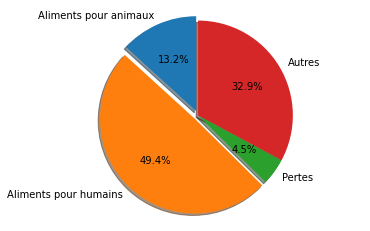

In [138]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Aliments pour animaux', 'Aliments pour humains', 'Pertes', 'Autres'
sizes = [df_dispo_alim["Aliments pour animaux"].sum() ,
         df_dispo_alim["Nourriture"].sum() ,
         df_dispo_alim["Pertes"].sum() +  autres_alim ,
         ( df_dispo_alim["Semences"].sum()+ df_dispo_alim["Traitement"].sum() +  df_dispo_alim["Autres Utilisations"].sum()  )]
explode = (0.05, 0.05, 0.0, 0.0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## **Notes laissées par Julien**

Julien a découvert des chiffres intéressants sur l’utilisation des céréales, notamment la répartition entre l’alimentation humaine (colonne Nourriture) et l’alimentation pour animaux. La liste des céréales peut être trouvée en allant fouiller un peu dans l’onglet Bilans alimentaires du site de la FAO.

J'ai ensuite filtré par Céréales - Excl Bière > (Liste) et j'ai extrait  cette liste de céréale via **unique()** :

- Blé et produits
- Riz et produits
- Orge et produits
- Maïs et produits
- Seigle et produits
- Avoine
- Sorgho et produits
- Céréales, Autres
- Millet et produits

In [160]:
lst_cereales = ["Blé et produits","Millet et produits", "Maïs et produits", "Orge et produits", "Riz et produits", "Sorgho et produits", "Avoine", "Seigle et produits","Céréales, Autres"]

In [161]:
autres_alim_crl = df_dispo_alim["Disponibilité intérieure"][df_dispo_alim["Produit"].isin(lst_cereales)].sum() - (df_dispo_alim["Aliments pour animaux"][df_dispo_alim["Produit"].isin(lst_cereales)].sum() +
         df_dispo_alim["Nourriture"][df_dispo_alim["Produit"].isin(lst_cereales)].sum() +
         df_dispo_alim["Pertes"][df_dispo_alim["Produit"].isin(lst_cereales)].sum()  +
         df_dispo_alim["Semences"][df_dispo_alim["Produit"].isin(lst_cereales)].sum() + 
         df_dispo_alim["Traitement"][df_dispo_alim["Produit"].isin(lst_cereales)].sum() +  
         df_dispo_alim["Autres Utilisations"][df_dispo_alim["Produit"].isin(lst_cereales)].sum() )

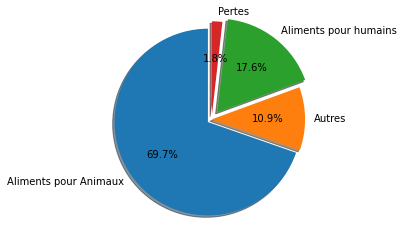

In [162]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Aliments pour Animaux','Autres', 'Aliments pour humains', 'Pertes'
sizes = [df_dispo_alim["Aliments pour animaux"][df_dispo_alim["Produit"].isin(lst_cereales)].sum(),
    (df_dispo_alim["Autres Utilisations"][df_dispo_alim["Produit"].isin(lst_cereales)].sum() +  df_dispo_alim["Semences"][df_dispo_alim["Produit"].isin(lst_cereales)].sum() + df_dispo_alim["Traitement"][df_dispo_alim["Produit"].isin(lst_cereales)].sum() ),
         df_dispo_alim["Nourriture"][df_dispo_alim["Produit"].isin(lst_cereales)].sum() , 
         (df_dispo_alim["Pertes"][df_dispo_alim["Produit"].isin(lst_cereales)].sum() + autres_alim_crl )
           ]
explode = (0.05, 0, 0.1, 0.05)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### Julien se souvient d’un exemple étonnant d’utilisation du manioc par la Thaïlande aux égards de la proportion de personnes en sous-nutrition. De mémoire ça concernait l’exportation par rapport à la production.

#### Proportion Alimentation Exportation/Production en Thailande

Je filtre par ordre décroissant les exportations de la Thaïlande ce qui me donne les produits les plus exportés en 2017

In [163]:
thai_alim_export5 = df_dispo_alim.loc["Thaïlande"][["Exportations - Quantité"] + ["Production" ]+ ["Produit"]].sort_values(by="Exportations - Quantité",ascending=False).head(5)

Et l'on peut retrouver le Manioc en 1ère place comme Julien l'a remarqué.
Représentons cela par un graphique.

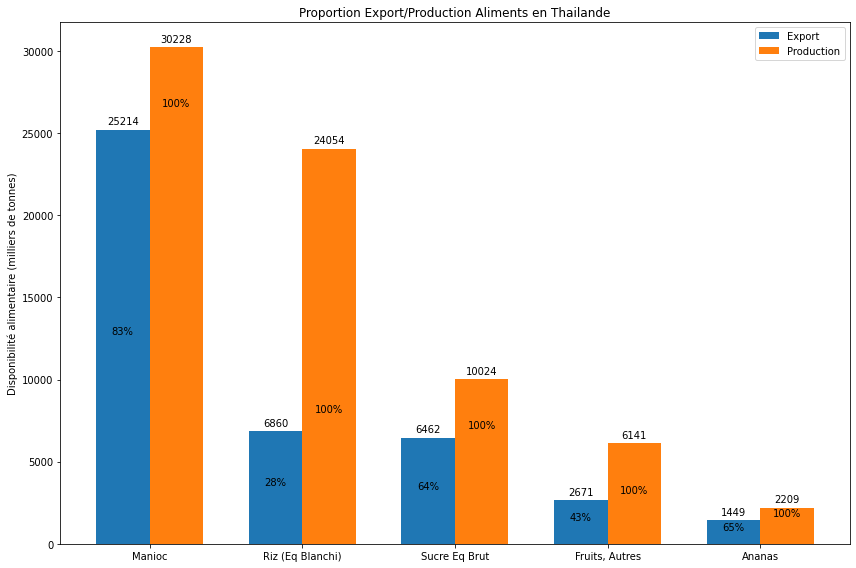

In [165]:

fig, ax = plt.subplots(1,figsize=(12, 8))
N=5
ind = np.arange(N)

width = 0.35 
p1 = ax.bar(ind - width/2, thai_alim_export5["Exportations - Quantité"] / 10**6,width, label='Export')
p2 = ax.bar(ind + width/2, thai_alim_export5["Production"] / 10**6,width, 
            label='Production')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('Disponibilité alimentaire (milliers de tonnes)')
ax.set_title('Proportion Export/Production Aliments en Thailande')
ax.set_xticks(ind)
ax.set_xticklabels(thai_alim_export5["Produit"])
ax.legend()

ax.bar_label(p1, padding=3)
ax.bar_label(p2, padding=3)

fig.tight_layout()

for r1, r2 in zip(p1, p2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    percent = int(h1 * 100 / h2)
    ax.annotate('{}%'.format(percent),
                    xy=(r1.get_x() + r1.get_width() / 2, h1/2),
                    xytext=(0, 0),
                    textcoords="offset points",
                    ha='center', va='bottom')
    ax.annotate('100%',
                    xy=(r2.get_x() + r2.get_width() / 2, h1+h2/23),
                    xytext=(0, 0), 
                    textcoords="offset points",
                    ha='center', va='bottom')
plt.show()

Regardons la proportion de personnes en état de malnutrition en Thaïlande

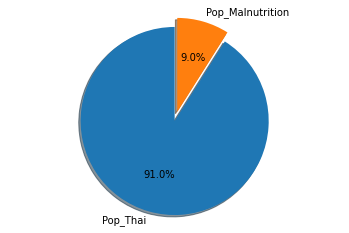

In [273]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Pop_Thai', 'Pop_Malnutrition'
sizes = [df_pop.loc["Thaïlande"][df_pop.loc["Thaïlande"]["Année"] == 2017]["Valeur"][0] - df_sous_nutr.loc["Thaïlande"][df_sous_nutr.loc["Thaïlande"]["Année"] == "2017"]["Valeur"][0],
       df_sous_nutr.loc["Thaïlande"][df_sous_nutr.loc["Thaïlande"]["Année"] == "2017"]["Valeur"][0] ]
explode = ( 0.1, 0.0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Voyons combien de personnes pourraient être nourries avec le Manioc exporté à hauteur de 83 %

In [196]:
df_thai_manioc = df_dispo_alim.loc["Thaïlande"][df_dispo_alim.loc["Thaïlande"]["Produit"] == "Manioc"]

In [203]:
print("La disponibilité alimentaire en Thaïlande en kcal pour le Manioc est de :",df_thai_manioc["dispo_kcal"].sum(), "kcal")
total_pers_kcal =  round(df_thai_manioc["dispo_kcal"].sum() / (2250*365))
print(f"Nombre théorique de personnes qui pourraient être nourries avec le Manioc exporté en Thaïlande: {total_pers_kcal * 0.83} millions")
print(f"Proportion théorique : ", round((total_pers_kcal *0.83 )* 100 / df_pop["Population"].loc[(df_pop.index == "Thaïlande") & (df_pop["Année"] == 2017)].sum(), 2 ), "%")

La disponibilité alimentaire en Thaïlande en kcal pour le Manioc est de : 1010463.226 kcal
Nombre théorique de personnes qui pourraient être nourries avec le Manioc exporté en Thaïlande: 0.83 millions
Proportion théorique :  1.2 %


#### **Regardons de plus près la proportion Alimentation Animaux/Humain + Pertes en Thaïlande**

In [167]:
autres_alim_thai = df_dispo_alim.loc["Thaïlande"]["Disponibilité intérieure"].sum() - (df_dispo_alim.loc["Thaïlande"]["Aliments pour animaux"].sum() +
         df_dispo_alim.loc["Thaïlande"]["Nourriture"].sum() +
         df_dispo_alim.loc["Thaïlande"]["Pertes"].sum()  +
         df_dispo_alim.loc["Thaïlande"]["Semences"].sum() + df_dispo_alim.loc["Thaïlande"]["Traitement"].sum() +  df_dispo_alim.loc["Thaïlande"]["Autres Utilisations"].sum() )

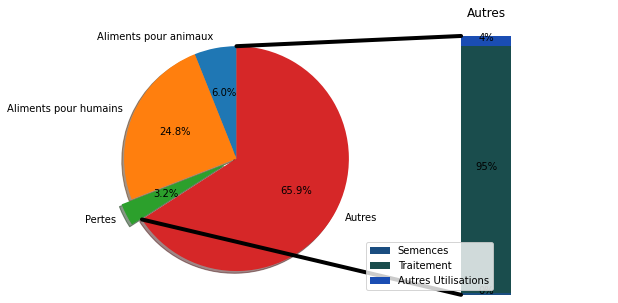

In [177]:
from matplotlib.patches import ConnectionPatch

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Aliments pour animaux', 'Aliments pour humains', 'Pertes', 'Autres'
sizes = [df_dispo_alim.loc["Thaïlande"]["Aliments pour animaux"].sum() ,
         df_dispo_alim.loc["Thaïlande"]["Nourriture"].sum() ,
         (df_dispo_alim.loc["Thaïlande"]["Pertes"].sum() + autres_alim_thai  ),
         df_dispo_alim.loc["Thaïlande"]["Semences"].sum() + df_dispo_alim.loc["Thaïlande"]["Traitement"].sum() + df_dispo_alim.loc["Thaïlande"]["Autres Utilisations"].sum()]
explode = (0, 0, 0.1, 0.0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# bar chart parameters

xpos = 0
bottom = 0
ratios = [df_dispo_alim.loc["Thaïlande"]["Semences"].sum() / (df_dispo_alim.loc["Thaïlande"]["Autres Utilisations"].sum() + df_dispo_alim.loc["Thaïlande"]["Semences"].sum() + df_dispo_alim.loc["Thaïlande"]["Traitement"].sum() ),
          df_dispo_alim.loc["Thaïlande"]["Traitement"].sum() / (df_dispo_alim.loc["Thaïlande"]["Autres Utilisations"].sum() + df_dispo_alim.loc["Thaïlande"]["Semences"].sum() + df_dispo_alim.loc["Thaïlande"]["Traitement"].sum() ),
         df_dispo_alim.loc["Thaïlande"]["Autres Utilisations"].sum() / (df_dispo_alim.loc["Thaïlande"]["Autres Utilisations"].sum() + df_dispo_alim.loc["Thaïlande"]["Semences"].sum() + df_dispo_alim.loc["Thaïlande"]["Traitement"].sum() )]
width = .2
colors = [[.1, .3, .5], [.1, .3, .3], [.1, .3, .7], [.1, .3, .9]]

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='center')

ax2.set_title('Autres')
ax2.legend(('Semences', 'Traitement','Autres Utilisations'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
pat=-2
theta1, theta2 = ax1.patches[pat].theta1, ax1.patches[pat].theta2
center, r = ax1.patches[pat].center, ax1.patches[pat].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

On remarque qu'il y a énormément de traitement. Voyons sur quels produits s'applique t'il.

In [436]:
df_dispo_alim.loc["Thaïlande"].sort_values(by="Traitement", ascending=False).head()

,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,...,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,dispo_kcal,Valeur nutritionnelle en protéine (pour 100g d'aliment/pers/jour)
Zone,,,,,,,,,,,,,,,,,,,,,
Thaïlande,"Sucre, canne",vegetale,0.000000e+00,0.0,49.0,61.11,0.33,0.17,1.000960e+11,0.000000e+00,...,4.095000e+09,1001.0,1.000960e+11,0.0,9.500000e+10,0.000000e+00,2017,69.20981,1.237817e+06,0.101538
Thaïlande,Soja,vegetale,0.000000e+00,194000000.0,22.0,2.13,0.98,1.96,1.860000e+09,1.200000e+07,...,1.430000e+08,93.0,1.900000e+08,3000000.0,1.428000e+09,0.000000e+00,2017,69.20981,5.557548e+05,33.586854
Thaïlande,Riz (Eq Blanchi),vegetale,2.405000e+09,0.0,1139.0,114.57,2.50,19.97,1.360500e+10,6.860000e+09,...,7.677000e+09,1786.0,2.405400e+10,606000000.0,1.130000e+09,-3.638000e+09,2017,69.20981,2.877294e+07,6.362093
Thaïlande,Orge,vegetale,0.000000e+00,0.0,0.0,0.00,0.00,0.00,4.410000e+08,0.000000e+00,...,0.000000e+00,0.0,9.500000e+07,1000000.0,4.400000e+08,1.100000e+07,2017,69.20981,0.000000e+00,NaN
Thaïlande,Palmistes,vegetale,0.000000e+00,0.0,0.0,0.00,0.00,0.00,4.350000e+08,1.600000e+07,...,0.000000e+00,0.0,4.500000e+08,0.0,4.350000e+08,0.000000e+00,2017,69.20981,0.000000e+00,NaN


In [445]:
trait_thai5 = df_dispo_alim.loc["Thaïlande"].sort_values(by="Traitement", ascending=False).head()

In [446]:
trait_thai5 = trait_thai5[["Produit"] + ["Traitement"] + ["Disponibilité intérieure"] + ["Exportations - Quantité"]]

In [447]:
trait_thai5["Taux de Traitement"] = trait_thai5["Traitement"] / trait_thai5["Disponibilité intérieure"] * 100

In [448]:
trait_thai5

,Produit,Traitement,Disponibilité intérieure,Exportations - Quantité,Taux de Traitement
Zone,,,,,
Thaïlande,"Sucre, canne",9.500000e+10,1.000960e+11,0.000000e+00,94.908887
Thaïlande,Soja,1.428000e+09,1.860000e+09,1.200000e+07,76.774194
Thaïlande,Riz (Eq Blanchi),1.130000e+09,1.360500e+10,6.860000e+09,8.305770
Thaïlande,Orge,4.400000e+08,4.410000e+08,0.000000e+00,99.773243
Thaïlande,Palmistes,4.350000e+08,4.350000e+08,1.600000e+07,100.000000


Le sucre de canne est le produit le plus traité et raffiné de Thaïlande. La Thäilande fait parti du top 5 des pays les plus exportateurs de sucre dans le monde. Mais sur les données de la FAO, le nombre d'exportation n'est pas renseigné. 

Après quelques recherches , **"un “Plan National pour l’Energie de la Thailande” dont l’objectif est de développer des débouchés alternatifs à la canne via la production d’éthanol avec l’objectif que 25% des carburants proviennent de biocarburants d’ici 2036"** qui expliquerait ce taux de traitement en plus du commerce de base de la canne à sucre dans le monde.

## **(Requête Secondaire) Top 20 des Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013**

#### Créer une liste unique des pays aidés

In [322]:
List_df_aide_alim = df_aide_alim.index.unique().tolist()

#### Créer un DataFrame représentant la valeur totale des aides envoyées pour chaque pays depuis 2013

In [323]:
data= []
for i in List_df_aide_alim:
    val_list = {"Pays" : i,
              "Valeur" : df_aide_alim.loc[i]["Valeur"].sum() }
    data.append(val_list)

Je convertis la colonne **Pays** en tant qu'index 

In [324]:
df_aide_alim_Top = pd.DataFrame(data=data)
df_aide_alim_Top.set_index('Pays',inplace=True)

In [89]:
df_aide_alim_Top.sort_values(by = "Valeur", ascending= False).head(20)

,Valeur
Pays,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784
Kenya,552836
Bangladesh,348188
Somalie,292678
République démocratique du Congo,288502


#### Représontons par un graphique les 5 Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013

In [325]:
top5_aide_alim = df_aide_alim_Top.sort_values(by = "Valeur", ascending= False).head(5)

Text(0.5, 0.98, "Top 5 Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013")

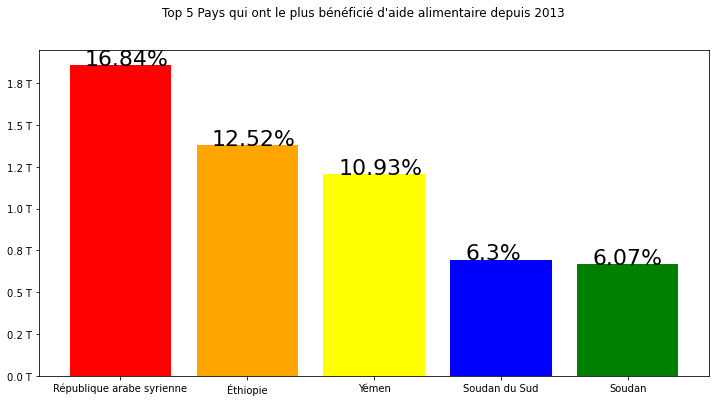

In [329]:
names = top5_aide_alim.index
values = top5_aide_alim.Valeur
def tonnes(x, pos):
    """The two args are the value and tick position."""
    return '{:1.1f} T'.format(x*1e-6)
fig, axs = plt.subplots(1, figsize=(12, 6))
axs.yaxis.set_major_formatter(tonnes)
axs.bar(names, values, color= ['red', 'orange', 'yellow', 'blue', 'green'])

totals = []

# find the values and append to list
for i in axs.patches:
    totals.append(i.get_height())
# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
for i in axs.patches:
    
    # get_x pulls left or right; get_height pushes up or down
    axs.text(i.get_x()+.12, i.get_height()-3, \
            str(round((i.get_height()/(df_aide_alim.Valeur.sum() ))*100, 2))+'%', fontsize=22,
                color='black')
fig.suptitle("Top 5 Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013")

## ****(Requête Secondaire) Pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017****

Je prends simplement les données de df_sous_nutr pour l'année 2017

In [208]:
df_sous_nutr17= df_sous_nutr[(df_sous_nutr["Année"] == "2017") ]

#### Nombre de pays dans le dataframe df_sous_nutr

In [210]:
df_sous_nutr17.index.value_counts().shape[0]

203

Le nombre total de personnes en état de malnutrition dans le monde en 2017 est de 537.7 millions

In [36]:
df_sous_nutr17.Valeur.sum()

537.7

#### **Top 10 des pays où le nombre de personnnes (en millions) en état de malnutrition est le plus fort en 2017**

In [219]:
df_sous_nutr17.Valeur.sort_values(ascending=False).head(10)

Zone
Inde                                          190.1
Pakistan                                       24.8
Indonésie                                      23.6
Nigéria                                        22.8
Bangladesh                                     21.5
Éthiopie                                       21.1
Philippines                                    15.7
République-Unie de Tanzanie                    13.4
République populaire démocratique de Corée     12.0
Kenya                                          11.9
Name: Valeur, dtype: float64

#### **Top 10 Pays où la Proportion des personnes en état de malnutrition est la plus forte en 2017 par rapport au nb Total de personnes sous alimentées dans le monde** 

In [220]:
df_sous_nutr17.Valeur.sort_values(ascending=False).head(10) / df_sous_nutr17.Valeur.sum() *100

Zone
Inde                                          35.486280
Pakistan                                       4.629457
Indonésie                                      4.405451
Nigéria                                        4.256113
Bangladesh                                     4.013440
Éthiopie                                       3.938772
Philippines                                    2.930745
République-Unie de Tanzanie                    2.501400
République populaire démocratique de Corée     2.240060
Kenya                                          2.221393
Name: Valeur, dtype: float64

Ces résultats ne répondent pas à la requête mais permettent de simplement voir la répartition mondiale de personnes en état de malnutrition.


#### Maintenant regardons de plus près la proportion de la population en état de malnutrition par pays

Je crée un DataFrame pour évaluer cette proportion

Je filtre par ordre décroissant le df sous_nutr17 sur la colonne **Valeur** qui représente le nb de personnes en état de sous nutrition

In [162]:
df_sous_nutr17_pop = df_sous_nutr17.sort_values(by="Valeur" ,ascending=False)

Je crée une liste unique des pays en sous nutrtion

In [163]:
List_df_pop = df_sous_nutr17_pop.index.unique().tolist()

In [172]:
data= []
for i in List_df_pop:
    val_list = {"Pays" : i,
                "Pop.Totale (en millions)" : df_pop.loc[i]["Valeur"][df_pop.loc[i]["Année"] == 2017][0],
              "Pop. Malnutrition (en millions)" : df_sous_nutr17_pop.loc[i]["Valeur"] }
    data.append(val_list)

Je convertis la colonne **Pays** du nouveau DataFrame en tant qu'index 

In [173]:
df_pop_Top = pd.DataFrame(data=data)
df_pop_Top.set_index('Pays',inplace=True)

J'ajoute une colonne **Proportion de personnes en malnutrition**

In [176]:
df_pop_Top["Proportion de personnes en malnutrition(%)"] =df_pop_Top["Pop. Malnutrition (en millions)"] / df_pop_Top["Pop.Totale (en millions)"] * 100

Et là, je réponds à la requête :

### **Top 10 des pays où la proportion des personnes en état de malnutrition est la plus forte en 2017**

In [194]:
df_pop_Top.sort_values(by="Proportion de personnes en malnutrition(%)", ascending=False).head(20)

,Pop.Totale (en millions),Pop. Malnutrition (en millions),Proportion de personnes en malnutrition(%)
Pays,,,
Haïti,10.982366,5.3,48.259182
République populaire démocratique de Corée,25.429825,12.0,47.188685
Madagascar,25.570512,10.5,41.062924
Libéria,4.702226,1.8,38.279742
Lesotho,2.091534,0.8,38.249438
Tchad,15.016753,5.7,37.957606
Rwanda,11.980961,4.2,35.055619
Mozambique,28.649018,9.4,32.810898
Timor-Leste,1.243258,0.4,32.173531


### **Top 10 des pays où la proportion des personnes en état de malnutrition est la plus faible en 2017**

In [203]:
df_pop_Top.sort_values(by="Proportion de personnes en malnutrition(%)", ascending=True).head(10)

,Pop.Totale (en millions),Pop. Malnutrition (en millions),Proportion de personnes en malnutrition(%)
Pays,,,
Bulgarie,7.102444,0.2,2.815932
Ouzbékistan,31.959785,0.9,2.816039
Algérie,41.389189,1.3,3.140917
Émirats arabes unis,9.487203,0.3,3.162154
Malaisie,31.104646,1.0,3.214954
Chili,18.470439,0.6,3.248434
Ukraine,44.487709,1.5,3.371718
Argentine,43.937140,1.5,3.413968
Turkménistan,5.757667,0.2,3.473629


## **(Requête Secondaire) Pays où la Disponibilité alimentaire est la plus forte par habitant en 2013**

Je crée un DataFrame représentant la disponibilité alimentaire totale en (kcal/pers/an) et par pays pour l'année 2013 

In [452]:
List_df_dispo_alim = df_dispo_alim.index.unique().tolist()

In [461]:
data= []
for i in List_df_dispo_alim:
    val_list = {"Pays" : i,
              "Dispo_alim (kcal/pers/an)" : df_dispo_alim.loc[i]["Disponibilité alimentaire (Kcal/personne/jour)"].sum() * 365 }
    data.append(val_list)

In [462]:
df_dispo_alim_Top = pd.DataFrame(data=data)
df_dispo_alim_Top.set_index('Pays',inplace=True)

#### Je réponds à la requête : **Top 20 Pays où la Disponibilité alimentaire est la plus forte par habitant en 2013**

In [464]:
df_dispo_alim_Top.sort_values(by = "Dispo_alim (kcal/pers/an)", ascending= False).head(20)

,Dispo_alim (kcal/pers/an)
Pays,
Autriche,1376050.0
Belgique,1364005.0
Turquie,1353420.0
États-Unis d'Amérique,1343930.0
Israël,1317650.0
Irlande,1314730.0
Italie,1305970.0
Luxembourg,1292100.0
Égypte,1284070.0


Représentation graphique du top 5 des pays où la disponibilité alimentaire est la plus forte par habitant en 2013

In [466]:
top5_dispo_alim = df_dispo_alim_Top.sort_values(by = "Dispo_alim (kcal/pers/an)", ascending= False).head(5)

Text(0.5, 0.98, 'Top 5 Pays où la disponibilité alimentaire est la plus forte par habitant (par jour) en 2013')

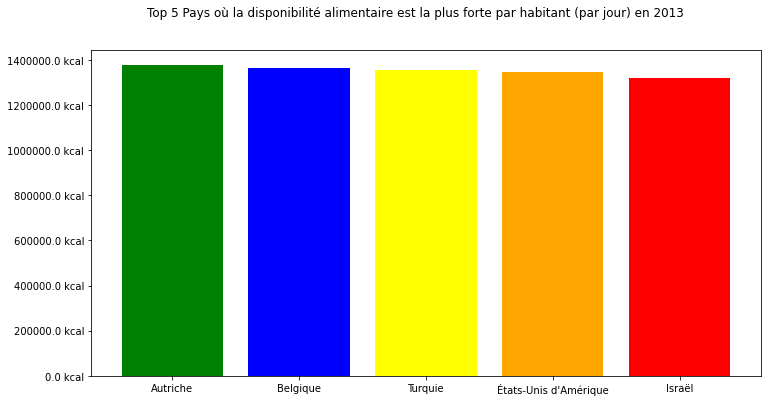

In [469]:
names = top5_dispo_alim.index
values = top5_dispo_alim["Dispo_alim (kcal/pers/an)"]
def kcal(x, pos):
    """The two args are the value and tick position."""
    return '{:1.1f} kcal'.format(x)
fig, axs = plt.subplots(1, figsize=(12, 6))
axs.yaxis.set_major_formatter(kcal)
axs.bar(names, values, color= ['green', 'blue', 'yellow', 'orange', 'red'])
fig.suptitle('Top 5 Pays où la disponibilité alimentaire est la plus forte par habitant (par jour) en 2013')

## **(Requête Secondaire) Pays où la Disponibilité alimentaire est la plus faible par habitant en 2013**

Je filtre le DataFrame crée précedemment par ordre croissant sur la colonne **Dispo_alim (kcal/pers/an)** pour répondre à la requête.

In [470]:
flop5_dispo_alim = df_dispo_alim_Top.sort_values(by = "Dispo_alim (kcal/pers/an)", ascending= True).head(5)

Représentation graphique du top 5 des pays où la disponibilité alimentaire est la plus faible par habitant en 2013

Text(0.5, 0.98, 'Top 5 Pays où la disponibilité alimentaire est la plus faible par habitant (par jour) en 2013')

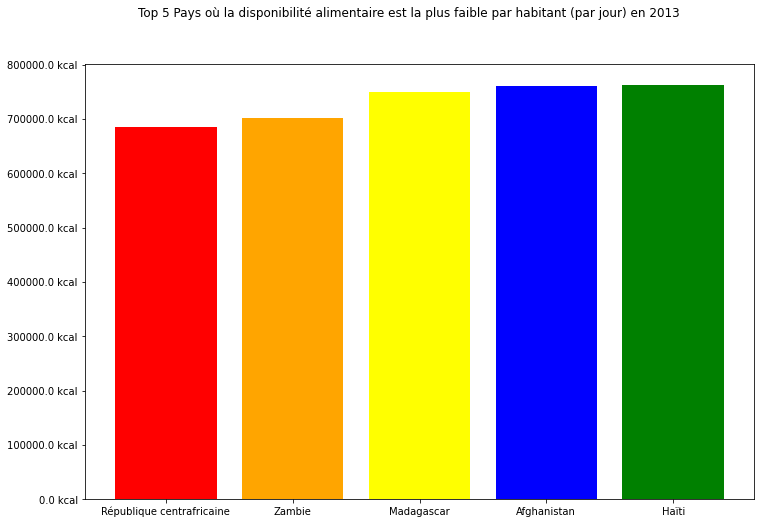

In [472]:
names = flop5_dispo_alim.index
values = flop5_dispo_alim["Dispo_alim (kcal/pers/an)"]
def kcal(x, pos):
    """The two args are the value and tick position."""
    return '{:1.1f} kcal'.format(x)
fig, axs = plt.subplots(1, figsize=(12, 8))
axs.yaxis.set_major_formatter(kcal)
axs.bar(names, values,color= ['red', 'orange', 'yellow', 'blue', 'green'])
fig.suptitle('Top 5 Pays où la disponibilité alimentaire est la plus faible par habitant (par jour) en 2013')

## **EXTRA- Lien entre l'exportation et la valeur nutritionnelle des aliments**

#### Ajouter une colonne **Valeur nutritionnelle en protéine (pour 100g d'aliment/pers/jour)**

In [117]:
df_dispo_alim["Valeur nutritionnelle en protéine (pour 100g d'aliment/pers/jour)"] = 100 / ((df_dispo_alim["Disponibilité alimentaire en quantité (kg/personne/an)"] * 1000) / 365) * df_dispo_alim["Disponibilité de protéines en quantité (g/personne/jour)"]

#### Ajouter une colonne **Valeur nutritionnelle en matiere grasse (pour 100g d'aliment/pers/jour)**

In [476]:
df_dispo_alim["Valeur nutritionnelle en matiere grasse (pour 100g d'aliment/pers/jour)"] = 100 / ((df_dispo_alim["Disponibilité alimentaire en quantité (kg/personne/an)"] * 1000) / 365) * df_dispo_alim["Disponibilité de matière grasse en quantité (g/personne/jour)"]

Créer un DataFrame ciblé sur l'exportation et la valeur nutrtionnelle des produits en Ethiopie (pays du tiers-monde)

In [477]:
df_ethio_export = df_dispo_alim.loc["Éthiopie"].sort_values(by = "Exportations - Quantité", ascending= False).head(10)

In [478]:
df_ethio_export[["Produit"] + ["Exportations - Quantité"] + ["Valeur nutritionnelle en protéine (pour 100g d'aliment/pers/jour)"] + ["Valeur nutritionnelle en matiere grasse (pour 100g d'aliment/pers/jour)"] + ["Disponibilité alimentaire (Kcal/personne/jour)"]]

,Produit,Exportations - Quantité,Valeur nutritionnelle en protéine (pour 100g d'aliment/pers/jour),Valeur nutritionnelle en matiere grasse (pour 100g d'aliment/pers/jour),Disponibilité alimentaire (Kcal/personne/jour)
Zone,,,,,
Éthiopie,Café,204000000.0,6.778571,0.000000,1.0
Éthiopie,Sésame,175000000.0,16.590909,49.772727,2.0
Éthiopie,Haricots,148000000.0,22.179426,1.746411,20.0
Éthiopie,Légumineuses Autres,121000000.0,23.735756,2.473969,96.0
Éthiopie,"Légumes, Autres",66000000.0,1.723480,0.236093,15.0
Éthiopie,Pommes de Terre,52000000.0,1.591729,0.109774,12.0
Éthiopie,"Plantes Oleiferes, Autre",36000000.0,16.846154,33.692308,2.0
Éthiopie,Tomates,19000000.0,1.073529,0.000000,0.0
Éthiopie,Arachides Decortiquees,17000000.0,26.545455,50.436364,9.0


L'on voit que les produits exportés sont d'une valeur nutritionnelle élevée, ce qui pourrait nourrir plus de personnes dans ces pays du tiers-monde sans l'exportation.

Comparons la répartition de la valeur nutritionnelle selon la disponibilité alimentaire d'un pays pauvre et d'un pays développé 

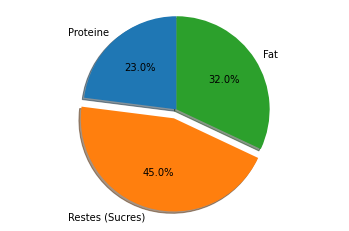

In [84]:
labels = 'Proteine', 'Restes (Sucres)', 'Fat'
sizes = [23,
          45,
           32
           ]
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Répartition idéal des macronutriments par rapport aux calories totales

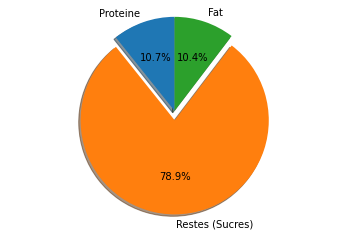

In [122]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Proteine', 'Restes (Sucres)', 'Fat'
sizes = [df_dispo_alim.loc["Éthiopie"]["Disponibilité de protéines en quantité (g/personne/jour)"].sum(),
         562.5 -(df_dispo_alim.loc["Éthiopie"]["Disponibilité de protéines en quantité (g/personne/jour)"].sum() + (df_dispo_alim.loc["Éthiopie"]["Disponibilité de matière grasse en quantité (g/personne/jour)"].sum() * 2.25)  ),
           df_dispo_alim.loc["Éthiopie"]["Disponibilité de matière grasse en quantité (g/personne/jour)"].sum() * 2.25
           ]
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Répartition des macronutriments par rapport aux calories totales en Ethiopie

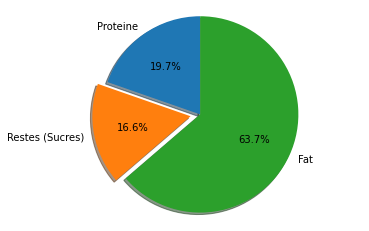

In [123]:
labels = 'Proteine', 'Restes (Sucres)', 'Fat'
sizes = [df_dispo_alim.loc["France"]["Disponibilité de protéines en quantité (g/personne/jour)"].sum(),
         ( df_dispo_alim.loc["France"]["Disponibilité de protéines en quantité (g/personne/jour)"].sum() + (df_dispo_alim.loc["France"]["Disponibilité de matière grasse en quantité (g/personne/jour)"].sum() * 2.25)  ) -375,
           df_dispo_alim.loc["France"]["Disponibilité de matière grasse en quantité (g/personne/jour)"].sum() * 2.25
           ]
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Répartition des macronutriments par rapport aux calories totales en France

## **EXTRA- Les Pays les plus peuplés en 2017**

Text(0.5, 0.98, 'Top 5 Pays les plus peuplés en 2017')

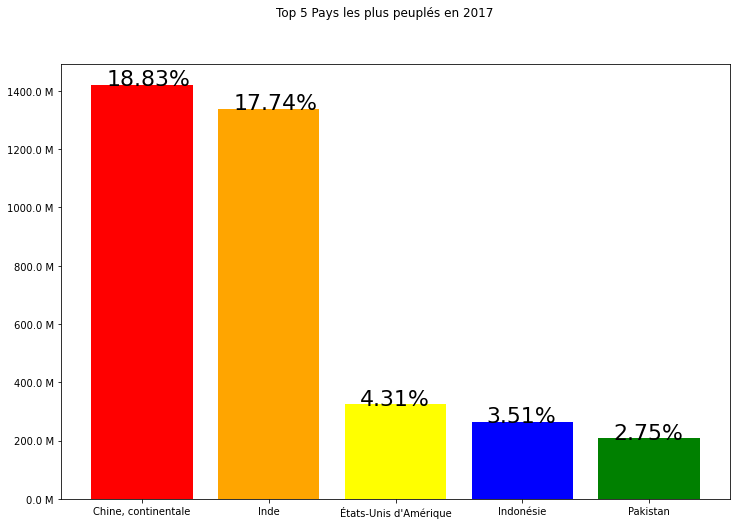

In [318]:
names = df_pop17.index
values = df_pop17.Valeur
def millions(x, pos):
    """The two args are the value and tick position."""
    return '{:1.1f} M'.format(x)
fig, axs = plt.subplots(1, figsize=(12, 8))
axs.yaxis.set_major_formatter(millions)
axs.bar(names, values,color= ['red', 'orange', 'yellow', 'blue', 'green'])
totals = []

# find the values and append to list
for i in axs.patches:
    totals.append(i.get_height())
# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
for i in axs.patches:
    
    # get_x pulls left or right; get_height pushes up or down
    axs.text(i.get_x()+.12, i.get_height()-3, \
            str(round((i.get_height()/(df_ss_nutr_Sum.loc[df_ss_nutr_Sum.index == "2017"]["Pop_Mondiale"][0] *1000))*100, 2))+'%', fontsize=22,
                color='black')
fig.suptitle('Top 5 Pays les plus peuplés en 2017')

La Chine et l'Inde représentent 1/3 de la population mondiale !